<a href="https://colab.research.google.com/github/Mouna876/MachineLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot

data = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

X = data.drop("Chance of Admit", axis=1)
y = data["Chance of Admit"]

def select_features(X_train, y_train, X_test, method='f_regression', k='all'):
    if method == 'f_regression':
        fs = SelectKBest(score_func=f_regression, k=k)
    elif method == 'mutual_info_regression':
        fs = SelectKBest(score_func=mutual_info_regression, k=k)
    else:
        raise ValueError("Méthode non reconnue. Utilisez 'f_regression' ou 'mutual_info_regression'.")

    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)

    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, method='f_regression', k='all')

model = LinearRegression()
model.fit(X_train_fs, y_train)

yhat = model.predict(X_test_fs)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)




MAE: 0.045


Best MAE: -0.004
Best Config: {'sel__k': 8}
>-0.004 with: {'sel__k': 1}
>-0.004 with: {'sel__k': 2}
>-0.004 with: {'sel__k': 3}
>-0.004 with: {'sel__k': 4}
>-0.004 with: {'sel__k': 5}
>-0.004 with: {'sel__k': 6}
>-0.004 with: {'sel__k': 7}
>-0.004 with: {'sel__k': 8}
>1 -0.049 (0.005)
>2 -0.046 (0.006)
>3 -0.045 (0.006)
>4 -0.044 (0.006)
>5 -0.044 (0.006)
>6 -0.044 (0.006)
>7 -0.043 (0.006)
>8 -0.043 (0.006)


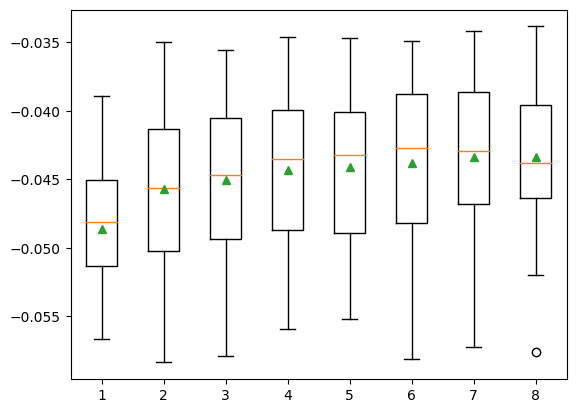

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel', fs), ('lr', model)])
grid = dict()
grid['sel__k'] = [i for i in range(max(1, X.shape[1] - 20), X.shape[1] + 1)]
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
results = search.fit(X, y)
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

num_features = [i for i in range(1, min(X.shape[1] + 1, results.best_params_['sel__k'] + 1))]
results = list()
for k in num_features:
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k)
    pipeline = Pipeline(steps=[('sel', fs), ('lr', model)])
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, np.mean(scores), np.std(scores)))

pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()